# Claude Sonnet 3.7 with v2.13 prompt

This notebook outlines the steps undertook to generate a prediction using Claude Sonnet 3.7 with prompt from 2/13/25.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from prediction_utils import predict
from evaluate_predictions import show_metrics

from instructions import claude_instructions_v213
MODEL_ID = "us.anthropic.claude-3-7-sonnet-20250219-v1:0"
SYSTEM_PROMPT = claude_instructions_v213

# Load the data

In [2]:
df = pd.read_csv("data/dataset.csv")
df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN


# Use the model to generation predictions

In [3]:
%%time
predictions = predict(df, MODEL_ID, SYSTEM_PROMPT)
predictions[:2]

INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:root:Completed: 3
INFO:root:Completed: 2
INFO:root:Completed: 0
INFO:root:Completed: 4
INFO:root:Completed: 1
INFO:root:Completed: 5
INFO:root:Completed: 7
INFO:root:Completed: 6
INFO:root:Completed: 8
INFO:root:Completed: 9
INFO:root:Completed: 10
INFO:root:Completed: 12
INFO:root:Completed: 11
INFO:root:Completed: 13
INFO:root:Completed: 14
INFO:root:Completed: 15
INFO:root:Completed: 17
INFO:root:Completed: 16
INFO:root:Completed: 18
INFO:root:Completed: 19
INFO:root:Completed: 20
INFO:root:Completed: 21
INFO:root:Completed: 22
INFO:root:Completed: 24
INFO:root:Completed: 23
INFO:root:Completed: 25
INFO:root:Completed: 27
INFO:root:Completed: 26
INFO:root:Completed: 28
INFO:root:Completed: 29


CPU times: user 1min 9s, sys: 5.68 s, total: 1min 15s
Wall time: 23min 2s


[{'0004.91306_cites_88240.txt': {'model': 'us.anthropic.claude-3-7-sonnet-20250219-v1:0',
   'input_tokens': 2542,
   'output_tokens': 130,
   'prediction': 'no',
   'confidence': 0.95,
   'rationale': "The passage discusses the Target Case (Texas v. Hardenberg) but does not contain any Explicit or Implicit Negative Actions toward it. Instead, the passage states that 'the grounds of the former decision were reconsidered and declared to be satisfactory,' indicating that the Target Case was affirmed rather than overruled. The passage then discusses subsequent cases that relied on the Target Case as precedent, further suggesting it remains valid law.",
   'raw_results': '```json\n{\n  "overruled": "no",\n  "confidence": 0.95,\n  "rationale": "The passage discusses the Target Case (Texas v. Hardenberg) but does not contain any Explicit or Implicit Negative Actions toward it. Instead, the passage states that \'the grounds of the former decision were reconsidered and declared to be satisfact

In [4]:
prediction_df = pd.DataFrame([
    {"filename": filename, **details}
    for prediction in predictions
    for filename, details in prediction.items()
])
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0004.91306_cites_88240.txt,us.anthropic.claude-3-7-sonnet-20250219-v1:0,2542,130,no,0.95,The passage discusses the Target Case (Texas v...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
1,0003.91306_cites_87633.txt,us.anthropic.claude-3-7-sonnet-20250219-v1:0,2576,130,no,0.95,The passage discusses the Target Case (Murray ...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
2,0001.91306_cites_88061.txt,us.anthropic.claude-3-7-sonnet-20250219-v1:0,3378,140,yes,0.95,The passage explicitly states that the positio...,"```json\n{\n ""overruled"": ""yes"",\n ""confiden..."
3,0005.91306_cites_88693.txt,us.anthropic.claude-3-7-sonnet-20250219-v1:0,2547,112,no,0.95,The passage discusses the Target Case (Hunting...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
4,0002.91306_cites_88994.txt,us.anthropic.claude-3-7-sonnet-20250219-v1:0,3059,148,no,0.95,The passages discuss the Target Case (Vermilye...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


## Save the raw prediction results

In [5]:
prediction_df.to_csv("predictions/1.claude/6.sonnet3.7_v213_prompt.csv", index=False)

## Check if any datapoints did not get prediction results and need to be re-predicted or cleaned

In [6]:
prediction_df["prediction"].isna().sum()

7

In [18]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
prediction_df = pd.read_csv("predictions/1.claude/6.sonnet3.7_v213_prompt.csv")

In [19]:
prediction_df["prediction"].isna().sum()

0

# Combine the prediction results with label for evaluation

In [20]:
assert len(df) == len(prediction_df)

In [21]:
eval_df = df.merge(prediction_df, how="left", on="filename")
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,us.anthropic.claude-3-7-sonnet-20250219-v1:0,3378,140,yes,0.95,The passage explicitly states that the positio...,"```json\n{\n ""overruled"": ""yes"",\n ""confiden..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,us.anthropic.claude-3-7-sonnet-20250219-v1:0,3059,148,no,0.95,The passages discuss the Target Case (Vermilye...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,us.anthropic.claude-3-7-sonnet-20250219-v1:0,2576,130,no,0.95,The passage discusses the Target Case (Murray ...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,us.anthropic.claude-3-7-sonnet-20250219-v1:0,2542,130,no,0.95,The passage discusses the Target Case (Texas v...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,us.anthropic.claude-3-7-sonnet-20250219-v1:0,2547,112,no,0.95,The passage discusses the Target Case (Hunting...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


# Run evaluation

In [22]:
df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [23]:
eval_df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [24]:
eval_df["prediction"].value_counts()

prediction
no     901
yes    183
Name: count, dtype: int64

In [25]:
eval_df["input_tokens"].sum()

4097062

In [26]:
eval_df["output_tokens"].sum()

158999

In [27]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0, "partially": 1})

In [28]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.97      0.94      0.95       935
         Yes       0.67      0.83      0.74       149

    accuracy                           0.92      1084
   macro avg       0.82      0.88      0.85      1084
weighted avg       0.93      0.92      0.92      1084



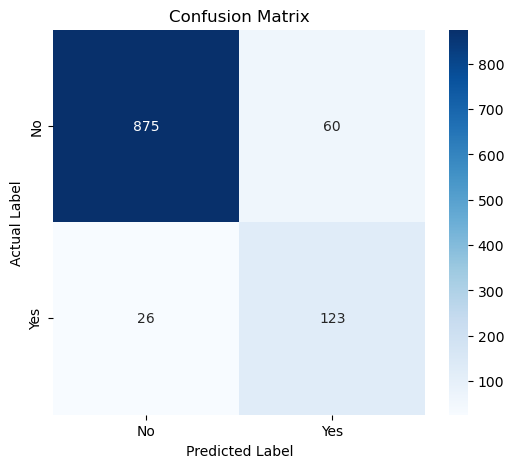

In [29]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [30]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.92
Precision: 0.67
Recall: 0.83
F-score: 0.74
Specificity: 0.94
---------
DATASET
Total Responses: 1084
Total Positives: 149
Total Negatives: 935
---------
RECOUNT
True positives: 123
True negatives: 875
False positives: 60
False negatives: 26


In [31]:
confidently_wrong_positive = (eval_df["prediction"] == "yes") & (eval_df["overruled"] == "no") & (eval_df["confidence"] >= 0.8)
confidently_wrong_positive.sum()

60

In [32]:
confidently_wrong_negative = (eval_df["prediction"] == "no") & (eval_df["overruled"] == "yes") & (eval_df["confidence"] >= 0.8)
confidently_wrong_negative.sum()

25

# Save the evaluation df

In [33]:
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,us.anthropic.claude-3-7-sonnet-20250219-v1:0,3378,140,yes,0.95,The passage explicitly states that the positio...,"```json\n{\n ""overruled"": ""yes"",\n ""confiden..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,us.anthropic.claude-3-7-sonnet-20250219-v1:0,3059,148,no,0.95,The passages discuss the Target Case (Vermilye...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,us.anthropic.claude-3-7-sonnet-20250219-v1:0,2576,130,no,0.95,The passage discusses the Target Case (Murray ...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,us.anthropic.claude-3-7-sonnet-20250219-v1:0,2542,130,no,0.95,The passage discusses the Target Case (Texas v...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,us.anthropic.claude-3-7-sonnet-20250219-v1:0,2547,112,no,0.95,The passage discusses the Target Case (Hunting...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


In [34]:
eval_df.to_csv("predictions/1.claude/6.sonnet3.7_v213_prompt_eval.csv", index=False)